In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import time


# data loading ...

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


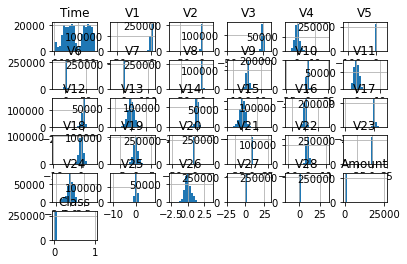

In [2]:
dta = pd.read_csv("creditcard.csv")   # from   https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
histogram = dta.hist(bins=20)

dta

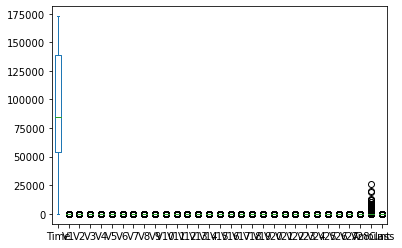

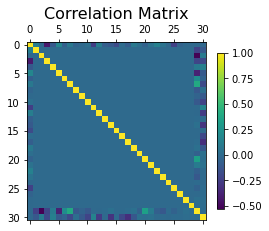

In [3]:
dta.plot.box()

plt.matshow(dta.corr())
cb = plt.colorbar(shrink=0.7)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# separating normal and fraud cases

In [4]:

normal = dta[dta.Class==0] # Set of all normal (Y = 0) cases
fraud = dta[dta.Class==1]  # Set of all fraud (Y = 1) cases


num_Norm=normal.shape[0] 
num_Fraud=fraud.shape[0] 

print(f"Number of Normal examples = {num_Norm}, Number of Fraud examples = {num_Fraud}\n")


normal_to_fraud_ratio_in_whole_data = (num_Norm/num_Fraud)
print(f'normal_to_fraud_ratio_in_whole_data = {normal_to_fraud_ratio_in_whole_data}')

Number of Normal examples = 284315, Number of Fraud examples = 492

normal_to_fraud_ratio_in_whole_data = 577.8760162601626


# sample building by choosing a normal_fraud_ratio

(49692, 31)


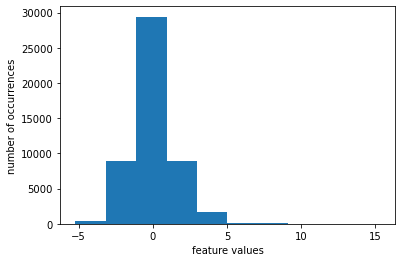

In [5]:

"""
for class = 1 (fraud), in whole dataset, 
precision increases and recall (given in the later part of the code) 
decreases as we increase normal_fraud_ratio
"""



normal_fraud_ratio = 100                                    # to mimic normal_to_fraud_ratio_in_whole_data
NormSample = normal.sample(normal_fraud_ratio*num_Fraud)    # normal_fraud_ratio = 1 means balance sample

smple = pd.concat([fraud, NormSample],axis=0)               # joining row-wise (axis=0) Normal and Fraud cases to get a sample
size = smple.shape[0]                                       # sample size

for i in range(100):
    smple = np.random.permutation(smple)                    # random shuffling of sample examples 100 times



#------------------------------------------------------

print(smple.shape)

feature_idx = 4
feature_values = smple[:,feature_idx]
plt.hist(feature_values)
plt.xlabel('feature values')
plt.ylabel("number of occurrences")
plt.show() 



# Train and test split

In [6]:
'Training sample of 60% of sample-size and the rest is for test'

num_train = int(np.floor(0.6*size))   

TrainSet = smple[0 : num_train]   # First num_train rows (examples) for training 
TestSet = smple[num_train :]      # Rest of rows (examples) for test 
num_test = TestSet.shape[0]


print(TrainSet.shape, TestSet.shape,)


(29815, 31) (19877, 31)


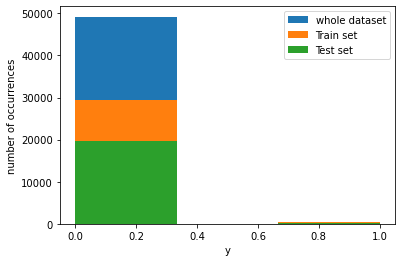

[0.99009901 0.00990099] = Distribution of classes in whole dataset
[0.98953547 0.01046453] = Distribution of classes in Train set
[0.99094431 0.00905569] = Distribution of classes in Test set

normalization of distributions : 1.0 1.0 1.0

Kullback–Leibler divergence between whole and train distributions : -3.848145631349517e-06
Kullback–Leibler divergence between whole and test distributions : 1.7720405598910943e-05


In [7]:
num_classes = 2

plt.hist(smple[:,-1], label='whole dataset', bins=2*num_classes-1)
plt.hist(TrainSet[:,-1], label='Train set', bins=2*num_classes-1)
plt.hist(TestSet[:,-1], label='Test set', bins=2*num_classes-1)
plt.legend()
plt.xlabel("y")
plt.ylabel("number of occurrences")
plt.show()


dis_whole_set = np.histogram(smple[:,-1], bins=num_classes)[0]/smple.shape[0]
dis_train_set = np.histogram(TrainSet[:,-1], bins=num_classes)[0]/TrainSet.shape[0]
dis_test_set = np.histogram(TestSet[:,-1], bins=num_classes)[0]/TestSet.shape[0]


print(dis_whole_set, "= Distribution of classes in whole dataset")
print(dis_train_set, "= Distribution of classes in Train set")
print(dis_test_set, "= Distribution of classes in Test set")

# these distribitions should be close to each other

print()
print("normalization of distributions :", dis_whole_set.sum(), dis_train_set.sum(), dis_test_set.sum())
print()

def KL_div(p, q): # Kullback–Leibler divergence
    q=q+0.00001   # for numerical stability
    return np.dot(p, np.log(p/q))

print("Kullback–Leibler divergence between whole and train distributions :", KL_div(dis_whole_set, dis_train_set))
print("Kullback–Leibler divergence between whole and test distributions :", KL_div(dis_whole_set, dis_test_set))


# functions for a Single-Layer Perceptron (Machine Learning model)

In [8]:

def Xy(Set):
    X = Set[:, 1:-2]              # excluding features (time and amount) and class
    n, m = X.shape                # number of examples (rows), features (columns)
    y = Set[:,-1].reshape((n, 1)) # class (labels) 
    return X, y
    


def sigmoid(z):  
    return 1/(1 + np.exp(-z))


def Loss(a, y):
    n = y.shape[0]
    loss = -(1/n) * ( y.T @ np.log(a + 0.0001) + (1-y).T @ np.log(1-a + 0.0001) ) # 0.0001 for numerical stability
    return loss[0,0]


def train(X, y, W, b, r):            # r = learning rate
    n = X.shape[0]                   # number of examples
    
    a = sigmoid(X@W + b)             # activation, size = n x 1
    loss = Loss(a, y)
    
    dw = (1/n) * (X.T @ (a - y))     # derivative of loss with respect to w of size m x 1
    db = (1/n) * sum(a - y)          # derivative of loss with respect to b
    db=db[0]
    
    #------- gradient descent----------
    
    W -= r*dw
    b -= r*db
    
    return W, b, loss
    
    

def predict(a, threshold=0.5):             # for binary classification: if p <= 0.5 predict 0, otherwise predict 1
    return np.heaviside(a-threshold, 0)



def accuracy(X, y, W, b, threshold=0.5):
    n, m = X.shape 
    #print(f"n = {n}, m = {m}")
    
    a = sigmoid(X@W + b)               # activation
    y_pred = predict(a, threshold)
    match = np.abs(y - y_pred)         # 0=matches 1=nomatch 
    acc = 1-np.mean(match)
    

    """
    pl=20
    print(y[0:pl].T, "= y")
    print(y_pred[0:pl].T, "= y_pred")
    print(match[0:pl].T, "= match")
    """ 
    
    return acc, y_pred

# With gradient descent, training ...

iteration: 0
iteration: 50
iteration: 100
iteration: 150
iteration: 200
iteration: 250
iteration: 300
iteration: 350
iteration: 400
iteration: 450


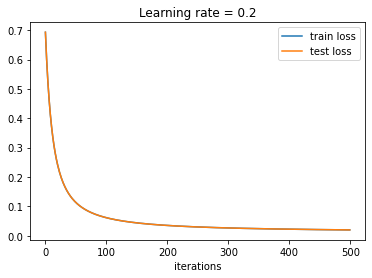

In [9]:

X_train, y_train = Xy(TrainSet)
X_test, y_test= Xy(TestSet)


#------------------------------------------------------------------------------------


itrs = 500;   # total number of iterations
r = 0.2       # learning rate

W = np.zeros((X_train.shape[1],1)) # Initializing lernable parameters W, b
b = 0 


#------------------------------------------------------------------------------------

LOSS=[]
for i in range(itrs):
    
    a_test = sigmoid(X_test@W + b)
    loss_test = Loss(a_test, y_test)                    # test loss before update
    
    W, b, loss_train = train(X_train, y_train, W, b, r) # train loss before update
    
    LOSS.append([loss_train, loss_test])  
    
    if i % 50 ==0:
        print(f'iteration: {i}')

    

Wsol, bsol = W, b   # learned parameters (obtained solution)

#------------------------------------------------------------------------------------


plt.plot(LOSS, label =['train loss', 'test loss'])
plt.xlabel('iterations')
plt.title(f"Learning rate = {r}")
plt.legend()
plt.show()


In [10]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

# Receiver Operating Characteristic (ROC) curve

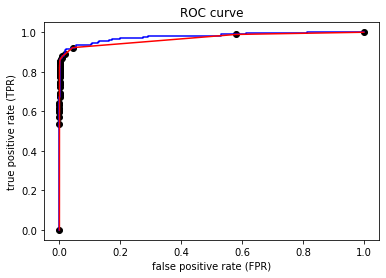

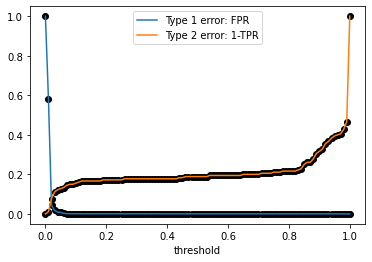

In [11]:
X, y = Xy(TestSet)
p = y.sum()  # number of positives for class=1

thresholds = np.arange(0, 1.01, 0.01)

TPR_FPR = [] # true positive rate (TPR) and false positive rate (FPR) for different thresholds
for threshold in thresholds:
    acc, y_pred = accuracy(X, y, Wsol, bsol, threshold)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    TPR_FPR.append([tp/p, fp/(X.shape[0]-p)])
    
#print(thresholds)
#print(TPR_FPR)

TPR_FPR = np.array(TPR_FPR)
TPR, FPR = TPR_FPR[:,0], TPR_FPR[:,1]

#----------------------roc_curve with sklearn--------------------------
a_sol_test = sigmoid(X_test@Wsol + bsol)
fpr, tpr, _ = roc_curve(y_test.flatten(), a_sol_test.flatten())
plt.plot(fpr, tpr, color='blue')
#---------------------------------------------------------------------


plt.plot(FPR, TPR, color='red')
plt.scatter(FPR, TPR, color='black')
plt.title('ROC curve')
plt.xlabel('false positive rate (FPR)')
plt.ylabel('true positive rate (TPR)')
plt.show()


plt.plot(thresholds, FPR, label='Type 1 error: FPR')
plt.scatter(thresholds, FPR, color='black')
plt.plot(thresholds, 1-TPR, label='Type 2 error: 1-TPR')
plt.scatter(thresholds, 1-TPR, color='black')
plt.xlabel('threshold')
plt.legend()
plt.show()


# performance evaluation

In [12]:

print("-----------------------  Trainning set ------------------------\n")

X, y = Xy(TrainSet)
train_acc, y_pred = accuracy(X, y, Wsol, bsol)
#print(f"Train accuracy = {train_acc:.3f}")
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred), "= confusion_matrix \n")

print("------------------------  Test set  ---------------------------\n")


X, y = Xy(TestSet)
test_acc, y_pred = accuracy(X, y, Wsol, bsol)
#print(f"Test accuracy = {test_acc:.3f}")
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred), "= confusion_matrix")


-----------------------  Trainning set ------------------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29503
         1.0       0.99      0.79      0.88       312

    accuracy                           1.00     29815
   macro avg       0.99      0.89      0.94     29815
weighted avg       1.00      1.00      1.00     29815

[[29501     2]
 [   66   246]] = confusion_matrix 

------------------------  Test set  ---------------------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19697
         1.0       0.95      0.81      0.88       180

    accuracy                           1.00     19877
   macro avg       0.98      0.91      0.94     19877
weighted avg       1.00      1.00      1.00     19877

[[19690     7]
 [   34   146]] = confusion_matrix


In [13]:
"""
for class = 1 (fraud), in whole dataset, 
precision increases and recall decreases as we increase normal_fraud_ratio
"""

print("-----------------------  whole dataset ------------------------\n")


data = dta.to_numpy()
X, y = Xy(data)
test_acc, y_pred = accuracy(X, y, Wsol, bsol)

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred), "= confusion_matrix")



-----------------------  whole dataset ------------------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284315
         1.0       0.85      0.80      0.82       492

    accuracy                           1.00    284807
   macro avg       0.92      0.90      0.91    284807
weighted avg       1.00      1.00      1.00    284807

[[284244     71]
 [   100    392]] = confusion_matrix


 $ $

# Classification using sklearn

$ $

In [14]:
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


In [15]:
def fitted_model(Set, clf):
    X = Set[:, 1:-2]  # excluding features (time and amount) and class
    Y = Set[:,-1]     # class (labels)
    
    clf_fit = clf.fit(X, Y)
    return clf_fit
    

def print_performance(TrainSet, TestSet, clf_fit):
    
    X, y = Xy(TrainSet)
    y_pred = clf_fit.predict(X)
    train_accu  = accuracy_score(y, y_pred)
    print(f"Train accuracy with sklearn = {train_accu:.3f}")
    
    X, y = Xy(TestSet)
    y_pred = clf_fit.predict(X)
    test_accu  = accuracy_score(y, y_pred)
    print(f"Test accuracy with sklearn = {test_accu:.3f}")
    print()


================ SVM Classifier ================
Train accuracy with sklearn = 0.998
Test accuracy with sklearn = 0.998

================ Decision Tree Classifier ================
Train accuracy with sklearn = 1.000
Test accuracy with sklearn = 0.996

================ Random Forest Classifier ================
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29503
         1.0       0.99      0.96      0.98       312

    accuracy                           1.00     29815
   macro avg       1.00      0.98      0.99     29815
weighted avg       1.00      1.00      1.00     29815

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19697
         1.0       0.96      0.83      0.89       180

    accuracy                           1.00     19877
   macro avg       0.98      0.91      0.94     19877
weighted avg       1.00      1.00      1.00     19877

              precision    recall  

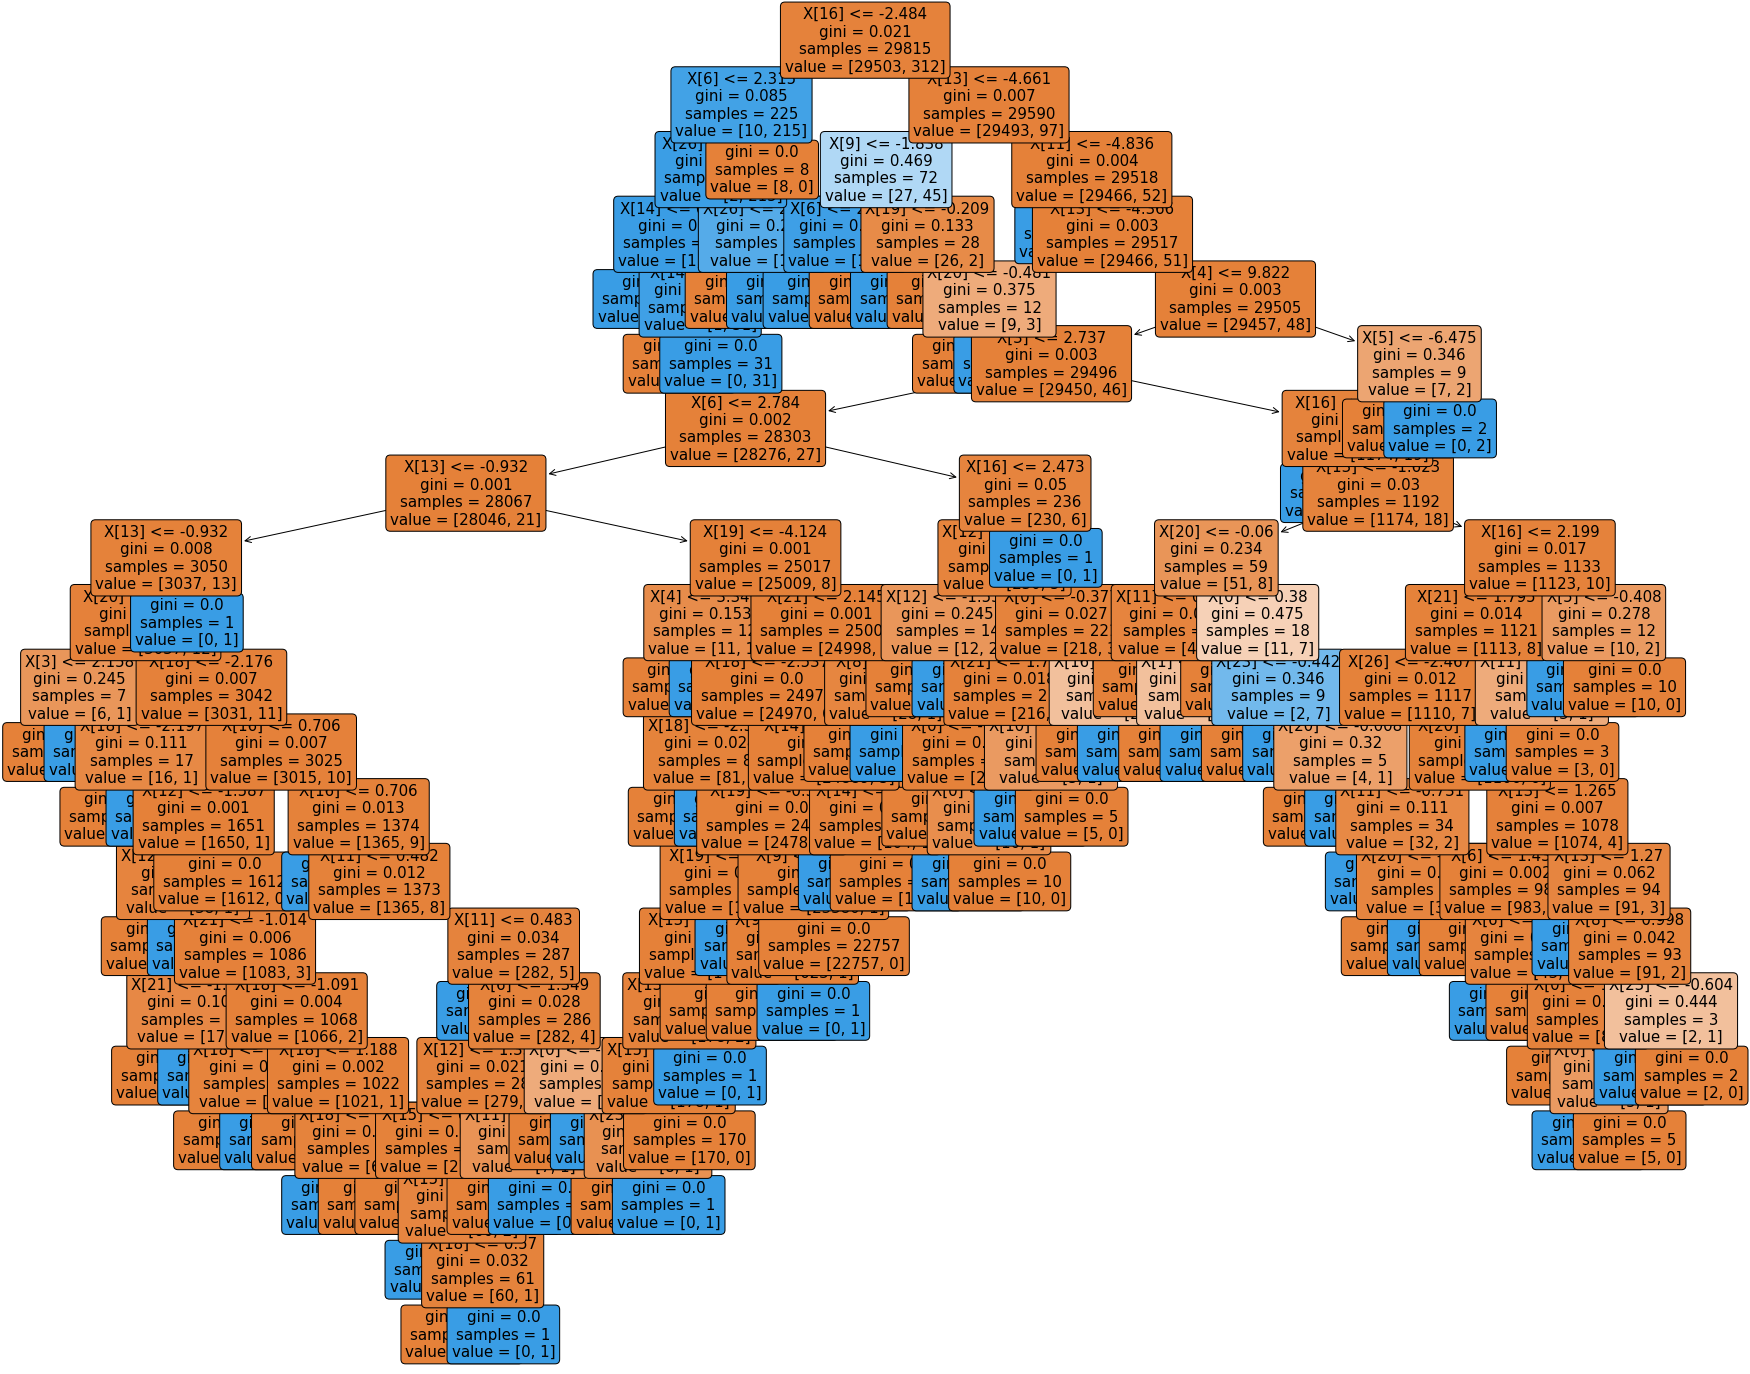

In [16]:
print("================ SVM Classifier ================")
clf = svm.SVC(kernel ='rbf') # ='linear' ='rbf' 
clf_fit = fitted_model(TrainSet, clf)

print_performance(TrainSet, TestSet, clf_fit)


print("================ Decision Tree Classifier ================")

clf = tree.DecisionTreeClassifier()
clf_fit_DT = fitted_model(TrainSet, clf)
print_performance(TrainSet, TestSet, clf_fit_DT)

fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(clf_fit_DT, rounded=True, filled=True, fontsize=15)


print("================ Random Forest Classifier ================")
clf = RandomForestClassifier(n_estimators=10)
clf_fit = fitted_model(TrainSet, clf)

X, y = Xy(TrainSet)
y_pred = clf_fit.predict(X)
print(classification_report(y, y_pred))

X, y = Xy(TestSet)
y_pred = clf_fit.predict(X)
print(classification_report(y, y_pred))


X, y = Xy(data)
y_pred = clf_fit.predict(X)
print(classification_report(y, y_pred))


print_performance(TrainSet, TestSet, clf_fit)



print("================ AdaBoost Classifier ================")
clf = AdaBoostClassifier()
clf_fit = fitted_model(TrainSet, clf)
print_performance(TrainSet, TestSet, clf_fit)



print("================ Gaussian naive_bayes Classifier ================")
clf = GaussianNB()
clf_fit = fitted_model(TrainSet, clf)
print_performance(TrainSet, TestSet, clf_fit)



In [17]:
#print(tree.export_text(clf_fit_DT))